Import

In [111]:
import pandas as pd
import matplotlib.pyplot as plt

Load

In [112]:
data1 = pd.read_csv("./files/edges/geolife.csv")
data2 = pd.read_csv("./files/edges/geolife_time_1min.csv")
data3 = pd.read_csv("./files/edges/geolife_time_30min.csv")
data4 = pd.read_csv("./files/edges/geolife_time_1day.csv")

data1_nodes = pd.read_csv("./files/nodes/nodes_geolife.csv")
data2_nodes = pd.read_csv("./files/nodes/nodes_geolife_time_1min.csv")
data3_nodes = pd.read_csv("./files/nodes/nodes_geolife_time_30min.csv")
data4_nodes = pd.read_csv("./files/nodes/nodes_geolife_time_1day.csv")
max_node_number1 = data1_nodes["Node"].max()

data5 = pd.read_csv("./files/edges/tdrive.csv")
data6 = pd.read_csv("./files/edges/tdrive_time_1min.csv")
data7 = pd.read_csv("./files/edges/tdrive_time_30min.csv")
data8 = pd.read_csv("./files/edges/tdrive_time_1day.csv")

data5_nodes = pd.read_csv("./files/nodes/nodes_tdrive.csv")
data6_nodes = pd.read_csv("./files/nodes/nodes_tdrive_time_1min.csv")
data7_nodes = pd.read_csv("./files/nodes/nodes_tdrive_time_30min.csv")
data8_nodes = pd.read_csv("./files/nodes/nodes_tdrive_time_1day.csv")
max_node_number2 = data5_nodes["Node"].max()

Function

In [113]:
def analyze(edges_df, nodes_df, node_max):
	merged_edges_df = pd.merge(nodes_df, edges_df, left_on="Node", right_on="Taxi1", how="left")
	merged_edges_df.fillna(0, inplace=True)

	num_edges = len(edges_df)
	num_nodes = len(nodes_df)

	# Max number of edges from a node
	max_edges_node = merged_edges_df.groupby("Node")[["Taxi1", "Taxi2"]].size().idxmax()
	max_edges_value = merged_edges_df.groupby("Node")[["Taxi1", "Taxi2"]].size().max()

	# Min number of edges from a node
	min_edges_node = merged_edges_df.groupby("Node")[["Taxi1", "Taxi2"]].size().idxmin()
	min_edges_value = merged_edges_df.groupby("Node")[["Taxi1", "Taxi2"]].size().min()

	# Average number of edges per node
	avg_edges_per_node = (num_edges / node_max) * 2
	avg_edges_per_active_node = (num_edges / num_nodes) * 2

	print(f"Number of edges: {num_edges}")
	print(f"Number of nodes: {node_max}")
	print(f"Number of nodes with edges: {num_nodes}")
	print(f"Max number of edges from a node: Node {max_edges_node} with {max_edges_value} edges")
	print(f"Min number of edges from a node: Node {min_edges_node} with {min_edges_value} edges")
	print(f"Average number of edges per node: {avg_edges_per_node:.2f}")
	print(f"Average number of edges per active node: {avg_edges_per_active_node:.2f}")

	# Visualization 1: Bar chart for number of edges per node
	plt.figure(figsize=(10, 6))
	edges_per_node = merged_edges_df.groupby("Node")[["Taxi1", "Taxi2"]].size().reset_index(name="Edges")
	plt.bar(edges_per_node["Node"], edges_per_node["Edges"])
	plt.title("Number of Edges per Node")
	plt.xlabel("Node")
	plt.ylabel("Number of Edges")
	plt.show()

	# Visualization 2: Histogram for the distribution of edges
	plt.figure(figsize=(10, 6))
	plt.hist(edges_per_node["Edges"], bins=20, color='blue', edgecolor='black')
	plt.title("Distribution of Edges")
	plt.xlabel("Number of Edges")
	plt.ylabel("Frequency")
	plt.show()

Analyze

      Node   Taxi1   Taxi2
0        4     0.0     0.0
1       10     4.0    10.0
2       11     0.0     0.0
3       14     0.0     0.0
4       19     0.0     0.0
...    ...     ...     ...
4355  5837  4989.0  5837.0
4356  5839  5694.0  5839.0
4357  5840  5824.0  5840.0
4358  5840  5601.0  5840.0
4359  5841  5666.0  5841.0

[4360 rows x 3 columns]
Node
4       2.0
10      2.0
11      2.0
14      2.0
19      2.0
       ... 
5835    4.0
5837    2.0
5839    2.0
5840    4.0
5841    2.0
Length: 2050, dtype: float64
Number of edges: 3724
Number of nodes: 5841
Number of nodes with edges: 2050
Max number of edges from a node: Node 4532 with 76.0 edges
Min number of edges from a node: Node 4 with 2.0 edges
Average number of edges per node: 1.28
Average number of edges per active node: 3.63


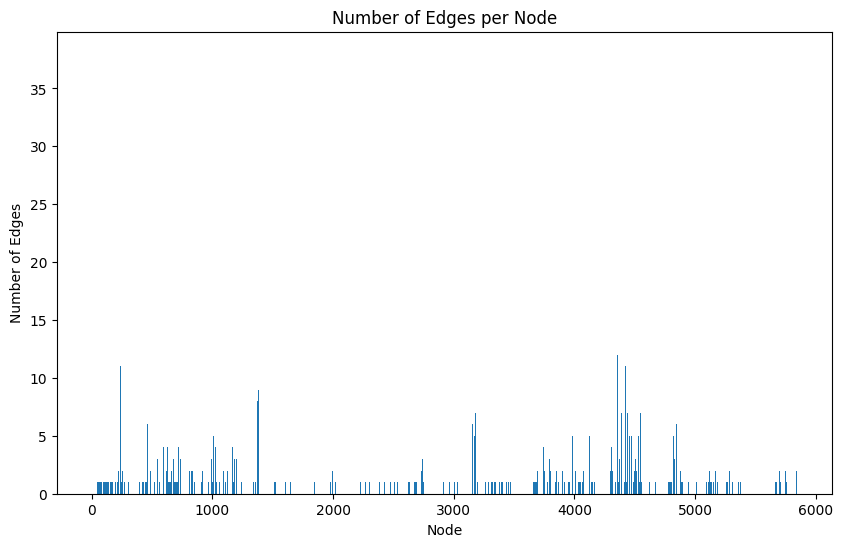

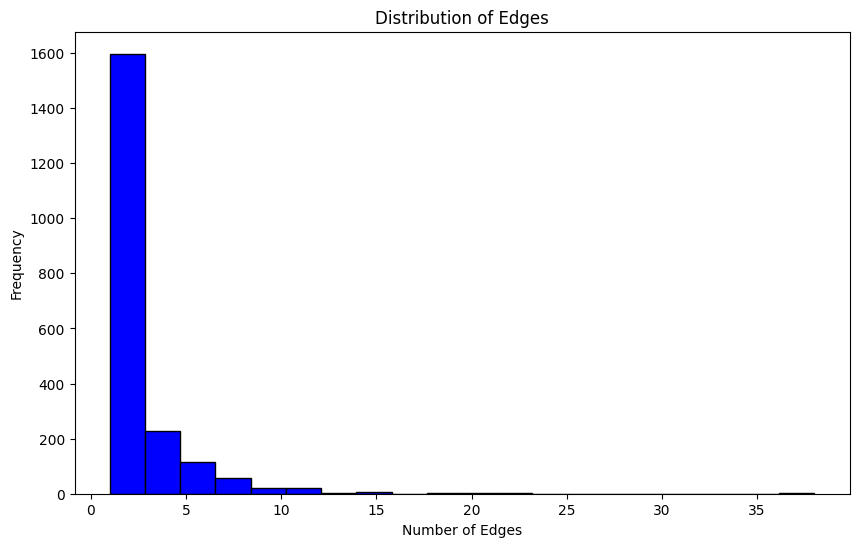

In [114]:
analyze(data1, data1_nodes, max_node_number1)

     Node  Taxi1  Taxi2
0     611   43.0  611.0
1     713  145.0  713.0
2     631   63.0  631.0
3     612   44.0  612.0
4     635   67.0  635.0
..    ...    ...    ...
263   629   61.0  629.0
264   659   91.0  659.0
265   707  139.0  707.0
266   630   62.0  630.0
267   610   42.0  610.0

[268 rows x 3 columns]
Node
42      2.0
43      2.0
44      2.0
45      2.0
46      2.0
       ... 
4552    2.0
4553    2.0
4554    2.0
4555    2.0
4556    2.0
Length: 268, dtype: float64
Number of edges: 134
Number of nodes: 5841
Number of nodes with edges: 268
Max number of edges from a node: Node 42 with 2.0 edges
Min number of edges from a node: Node 42 with 2.0 edges
Average number of edges per node: 0.05
Average number of edges per active node: 1.00


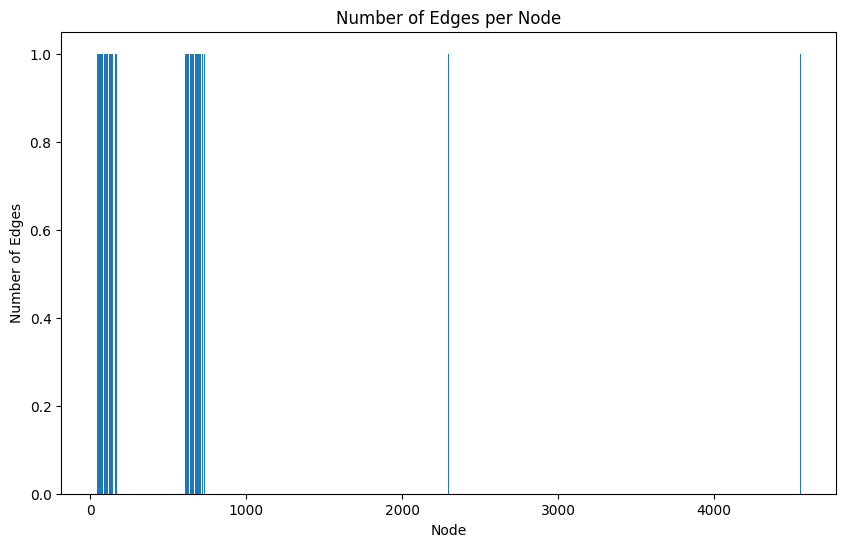

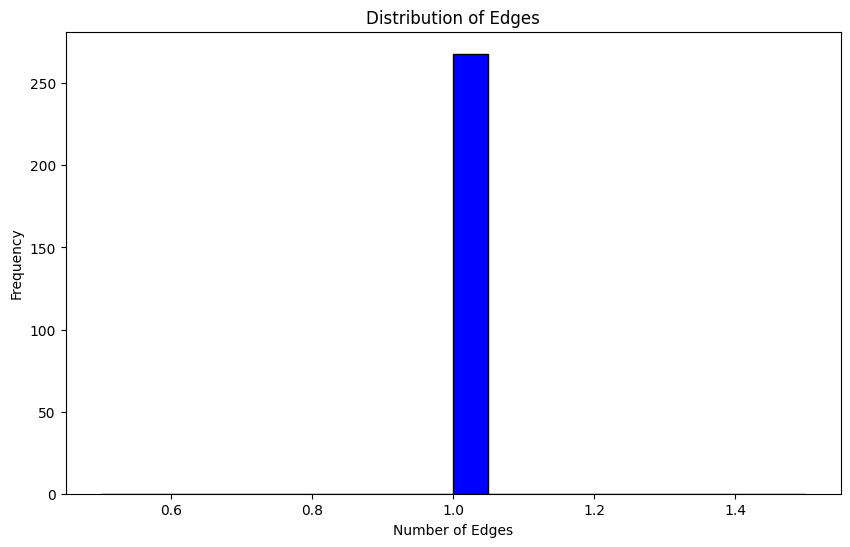

In [115]:
analyze(data2, data2_nodes, max_node_number1)

     Node  Taxi1  Taxi2
0     611   43.0  611.0
1     713  145.0  713.0
2     631   63.0  631.0
3     612   44.0  612.0
4     635   67.0  635.0
..    ...    ...    ...
263   629   61.0  629.0
264   659   91.0  659.0
265   707  139.0  707.0
266   630   62.0  630.0
267   610   42.0  610.0

[268 rows x 3 columns]
Node
42      2.0
43      2.0
44      2.0
45      2.0
46      2.0
       ... 
4552    2.0
4553    2.0
4554    2.0
4555    2.0
4556    2.0
Length: 268, dtype: float64
Number of edges: 134
Number of nodes: 5841
Number of nodes with edges: 268
Max number of edges from a node: Node 42 with 2.0 edges
Min number of edges from a node: Node 42 with 2.0 edges
Average number of edges per node: 0.05
Average number of edges per active node: 1.00


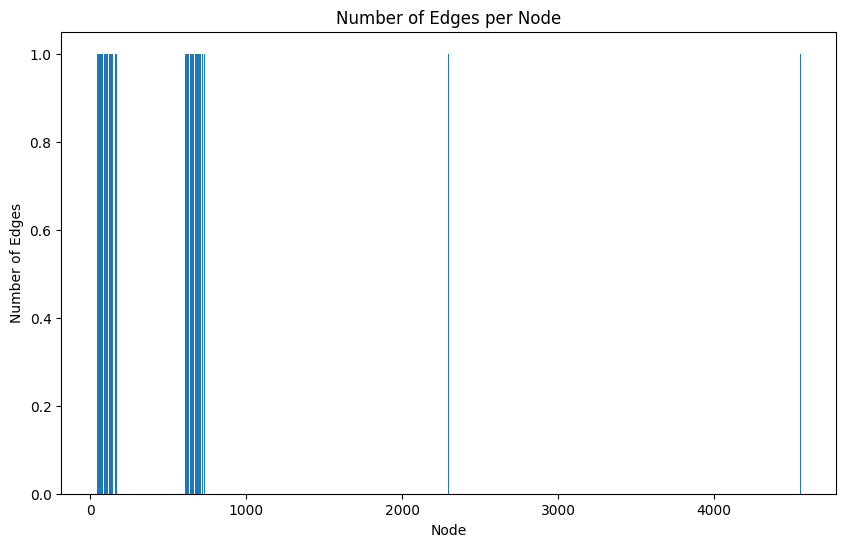

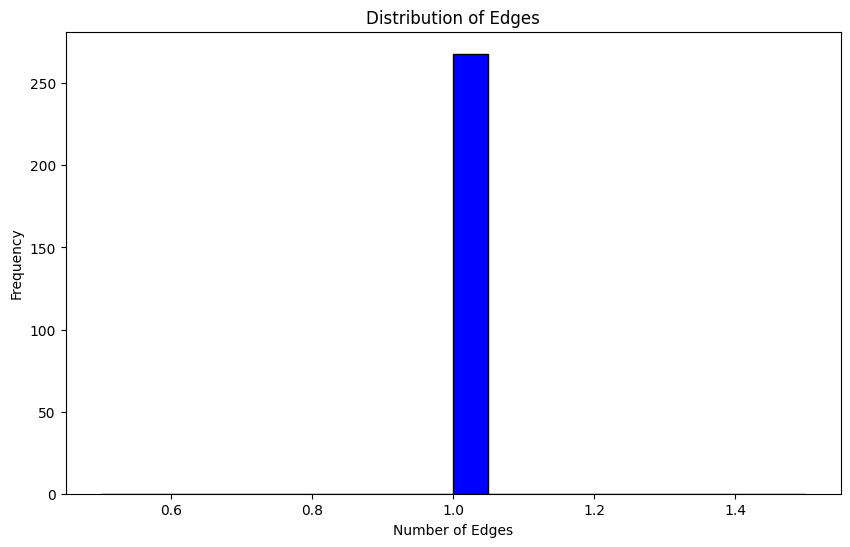

In [116]:
analyze(data3, data3_nodes, max_node_number1)

     Node   Taxi1   Taxi2
0      42     0.0     0.0
1      43     0.0     0.0
2      44     0.0     0.0
3      45     0.0     0.0
4      46     0.0     0.0
..    ...     ...     ...
350  1982  1981.0  1982.0
351  1983     0.0     0.0
352  1984  1983.0  1984.0
353  1985     0.0     0.0
354  1986  1985.0  1986.0

[355 rows x 3 columns]
Node
42      2.0
43      2.0
44      2.0
45      2.0
46      2.0
       ... 
5071    2.0
5115    2.0
5116    2.0
5169    2.0
5170    2.0
Length: 348, dtype: float64
Number of edges: 185
Number of nodes: 5841
Number of nodes with edges: 348
Max number of edges from a node: Node 689 with 6.0 edges
Min number of edges from a node: Node 42 with 2.0 edges
Average number of edges per node: 0.06
Average number of edges per active node: 1.06


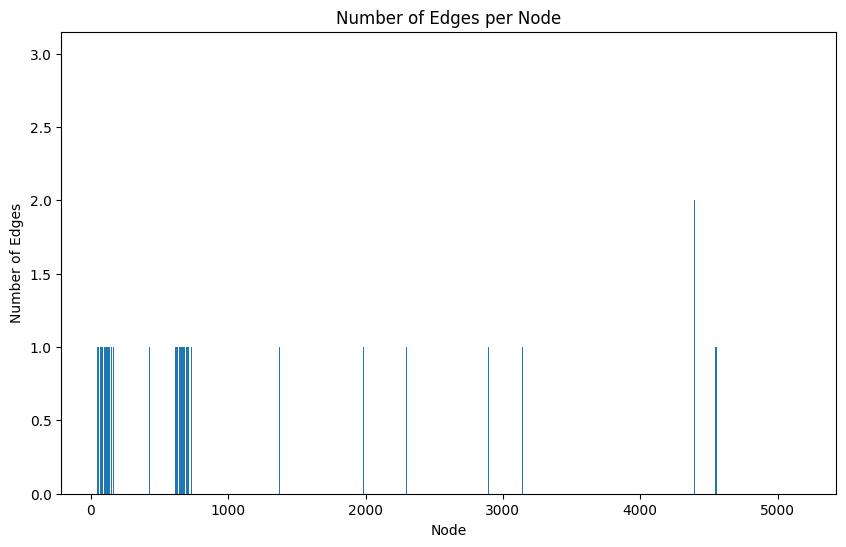

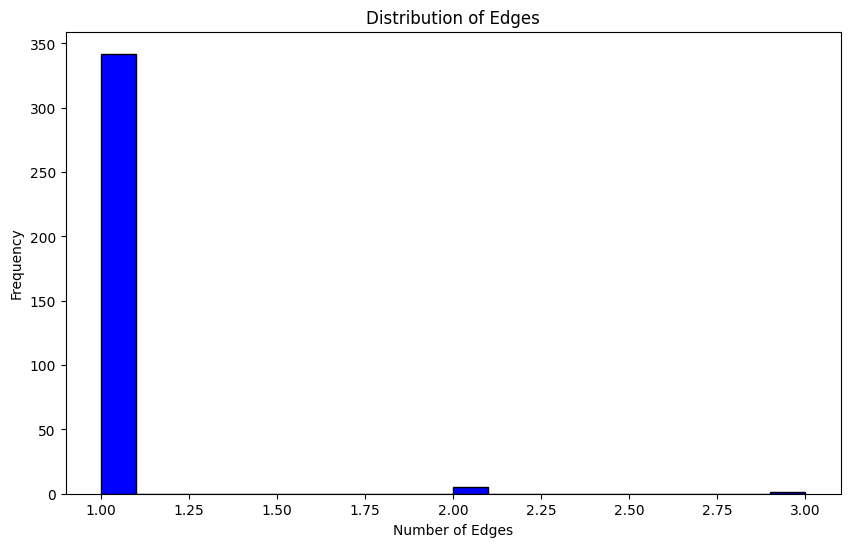

In [117]:
analyze(data4, data4_nodes, max_node_number1)

      Node    Taxi1    Taxi2
0    10247   1788.0  10247.0
1    10248  10072.0  10248.0
2       10      0.0      0.0
3     2058   1064.0   2058.0
4    10254   2458.0  10254.0
..     ...      ...      ...
604  10222   1741.0  10222.0
605   2033      0.0      0.0
606   2037      0.0      0.0
607   2041      0.0      0.0
608  10239   1796.0  10239.0

[609 rows x 3 columns]
Node
10       2.0
16       2.0
25       2.0
28       2.0
102      2.0
        ... 
10299    2.0
10304    2.0
10307    4.0
10331    2.0
10351    6.0
Length: 497, dtype: float64
Number of edges: 406
Number of nodes: 10351
Number of nodes with edges: 497
Max number of edges from a node: Node 10002 with 48.0 edges
Min number of edges from a node: Node 10 with 2.0 edges
Average number of edges per node: 0.08
Average number of edges per active node: 1.63


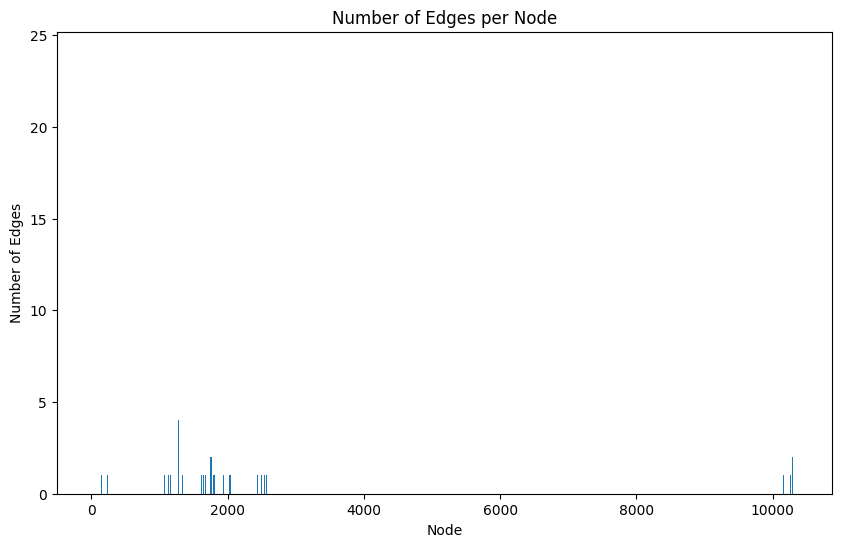

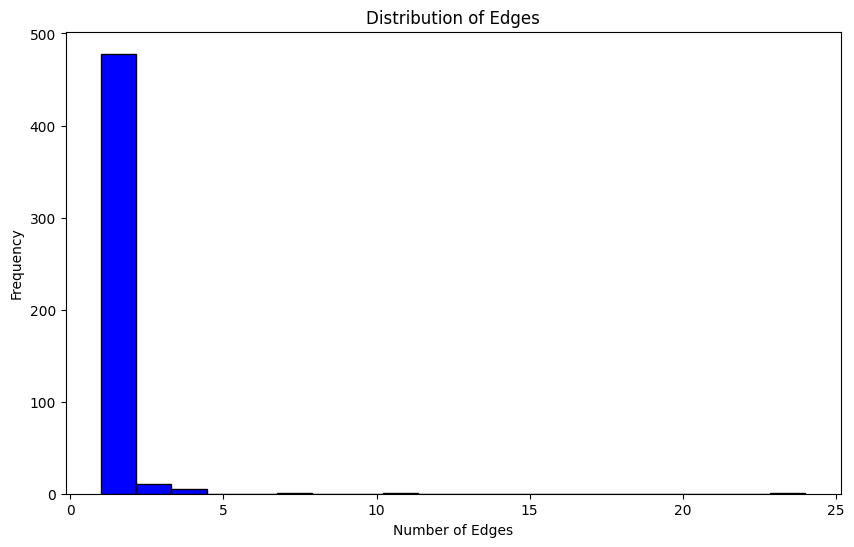

In [118]:
analyze(data5, data5_nodes, max_node_number2)

   Node   Taxi1   Taxi2
0  2560  2033.0  2560.0
1  2033     1.0  2033.0
2  2033     2.0  2033.0
3  2033     3.0  2033.0
4     1     0.0     0.0
5     2     1.0     2.0
6     3     0.0     0.0
Node
1       2.0
2       2.0
3       2.0
2033    6.0
2560    2.0
dtype: float64
Number of edges: 5
Number of nodes: 10351
Number of nodes with edges: 5
Max number of edges from a node: Node 2033 with 6.0 edges
Min number of edges from a node: Node 1 with 2.0 edges
Average number of edges per node: 0.00
Average number of edges per active node: 2.00


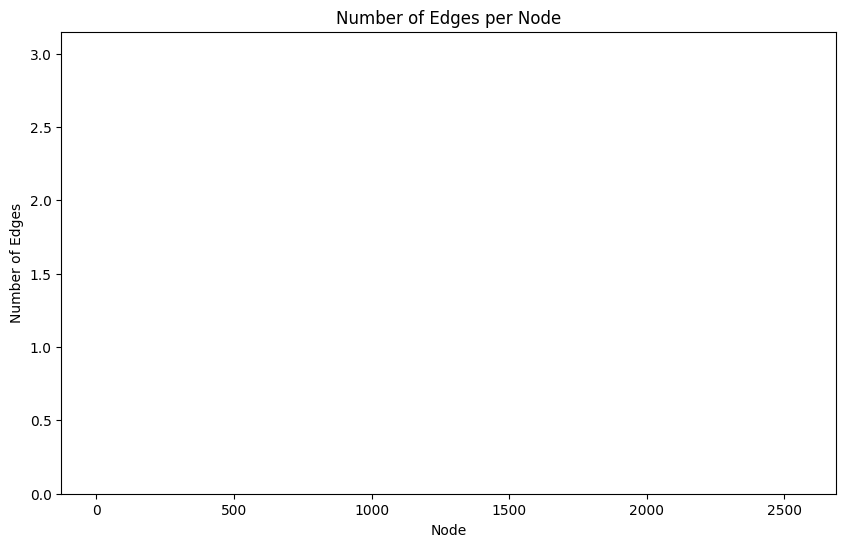

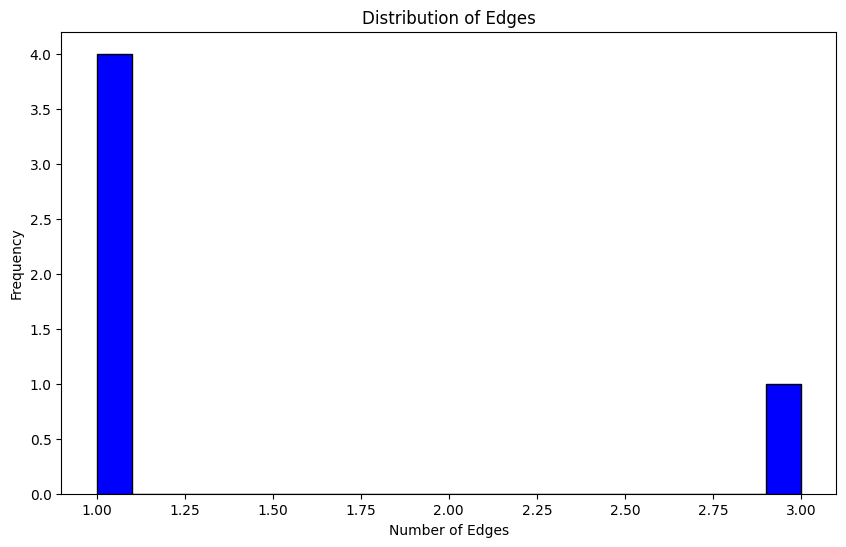

In [119]:
analyze(data6, data6_nodes, max_node_number2)

     Node   Taxi1    Taxi2
0    2560  2033.0   2560.0
1    2148  2142.0   2148.0
2    1064     0.0      0.0
3   10186  1064.0  10186.0
4    1770    28.0   1770.0
5    1743  1074.0   1743.0
6    2033     0.0      0.0
7    1074     0.0      0.0
8    1109     0.0      0.0
9    1115  1109.0   1115.0
10     28     0.0      0.0
11   2142     0.0      0.0
Node
28       2.0
1064     2.0
1074     2.0
1109     2.0
1115     2.0
1743     2.0
1770     2.0
2033     2.0
2142     2.0
2148     2.0
2560     2.0
10186    2.0
dtype: float64
Number of edges: 6
Number of nodes: 10351
Number of nodes with edges: 12
Max number of edges from a node: Node 28 with 2.0 edges
Min number of edges from a node: Node 28 with 2.0 edges
Average number of edges per node: 0.00
Average number of edges per active node: 1.00


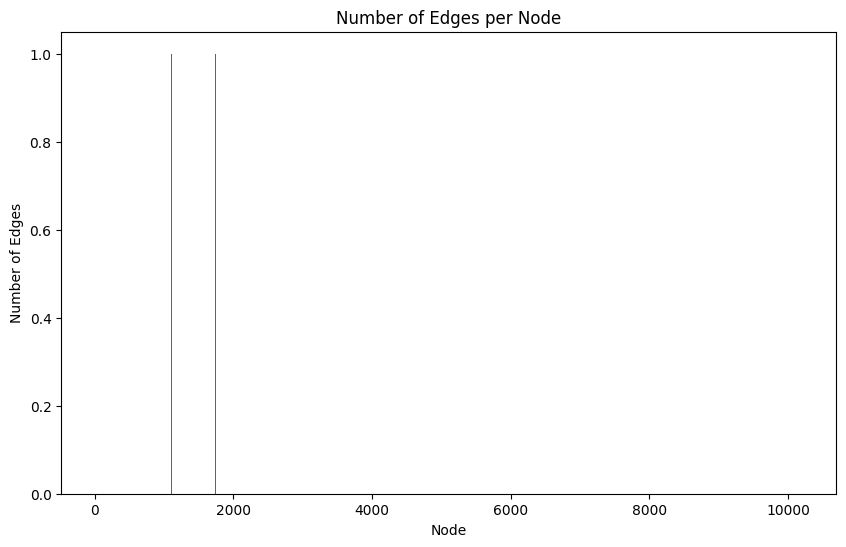

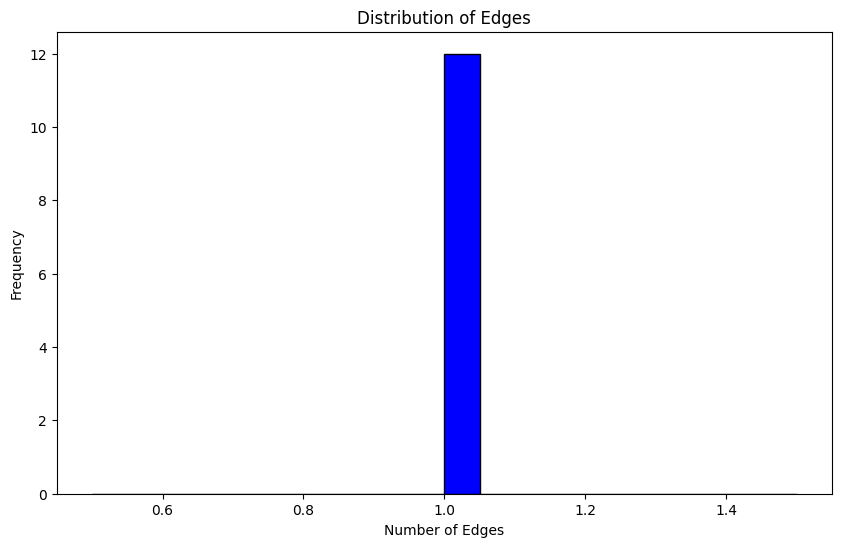

In [120]:
analyze(data7, data7_nodes, max_node_number2)

     Node   Taxi1   Taxi2
0    1024     0.0     0.0
1    1025     0.0     0.0
2    2560  1349.0  2560.0
3    2560  1286.0  2560.0
4    2560  2033.0  2560.0
..    ...     ...     ...
174  2541  1640.0  2541.0
175  1517  1098.0  1517.0
176  2033     0.0     0.0
177  1525     0.0     0.0
178  2549  1640.0  2549.0

[179 rows x 3 columns]
Node
16       2.0
25       2.0
28       2.0
102      2.0
124      2.0
        ... 
10261    2.0
10290    4.0
10307    2.0
10331    2.0
10351    4.0
Length: 162, dtype: float64
Number of edges: 103
Number of nodes: 10351
Number of nodes with edges: 162
Max number of edges from a node: Node 10002 with 14.0 edges
Min number of edges from a node: Node 16 with 2.0 edges
Average number of edges per node: 0.02
Average number of edges per active node: 1.27


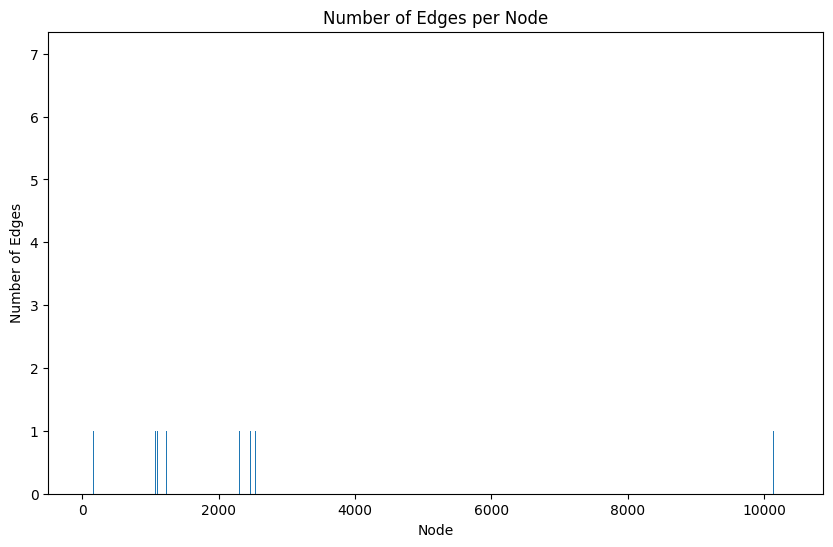

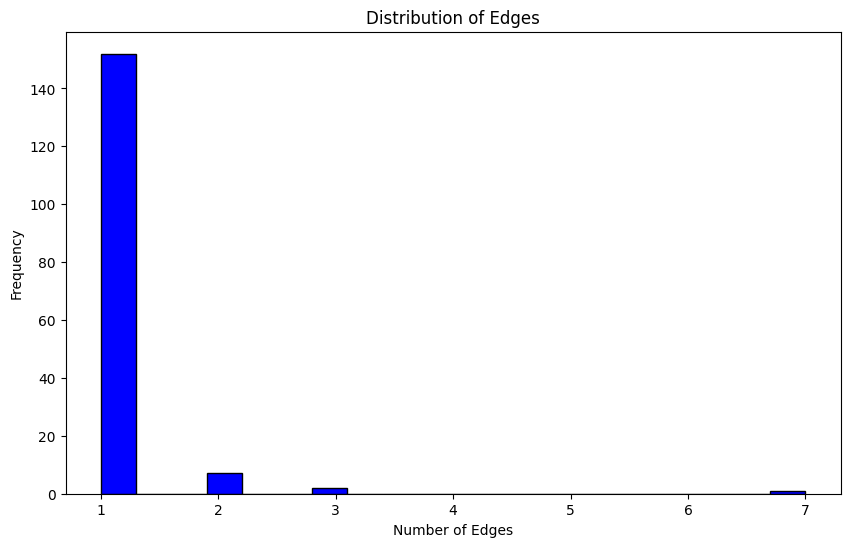

In [121]:
analyze(data8, data8_nodes, max_node_number2)